# Data Plotting and Fitting Exercise

##### Micheal Jones
Intermediate Lab

Here is an example of fitting data using python. 
Here is an outline of the method:
    1. Load needed libraries for analysis and plotting 
    2. Define a fitting function
    3. Load the data file (or define the data manually if easier)
    4. Perform the fit and plot the result
    
Load the needed libraries:

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

Now I will define three different fitting functions:

In [112]:
def linearFit(t, m, b): 
    return m*t + b

def expDecay(t, a, b, c):
    return a*np.exp(-b*t) + c

def gaussianWithOffset(t, a, c, sigma):
    return a*np.exp(-((t-c)**2)/(2*sigma**2))

"""
I've made my own fit functions below in order to demonstrate my ability, 
the given functions are above.
I define sigma or omega as b and t as x.
"""

def funcGaussian(a,b,c,x):
    return a*np.exp(-1*((x-c)**2)*(2*b**2))    
    
def funcCosine(a,c,w,t):
    return a*np.cos((w*t-w*c))

def funcLinear(x, m, b): 
    return m*x + b

Now I load the needed data file; the "skip_header" parameter allows
me to ignore the header line which labels the columns.

In [93]:
data = np.genfromtxt('002Data.txt', skip_header=1)

This next command slices the data by column and defines my variables per the header in the data file.

In [94]:
x = data[ : ,0]
z = data[ : ,1]
u = data[ : ,2]
v = data[ : ,3]
y = data[ : ,4]
e = data[ : ,5]

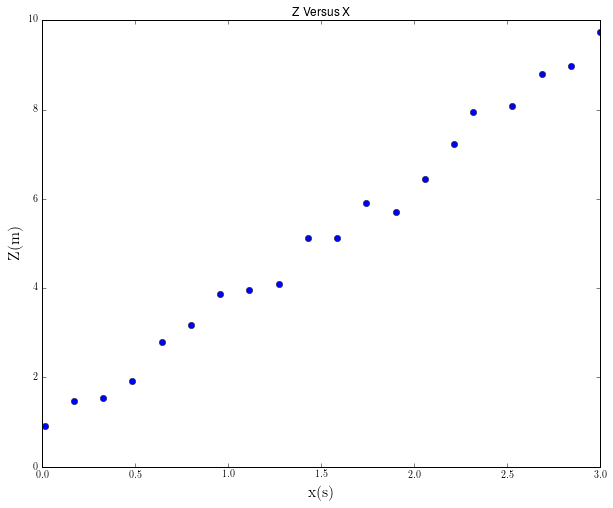

In [95]:
plt.plot(x,z,'o')
plt.title('Z Versus X')
plt.ylabel(r'$\mathrm{Z (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{x (s)}$', fontsize = 16)
plt.show()

The following defines the covariance matrix and the fit parameters for the function.

In [96]:
fitParams, fitCovariances = curve_fit(linearFit, x, z)
print(fitParams)
print(fitCovariances)

[ 2.92592864  0.73869777]
[[ 0.00440717 -0.00663102]
 [-0.00663102  0.01357327]]


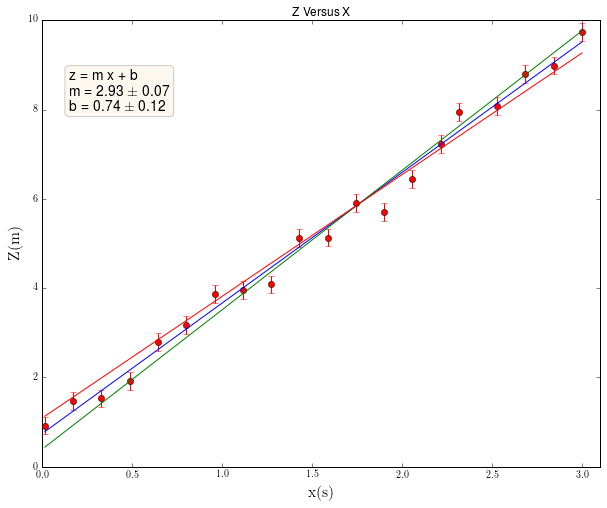

In [97]:
plt.ylabel(r'$\mathrm{Z (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{x (s)}$', fontsize = 16)
plt.title(r'Z Versus X')
plt.xlim(0,3.1)
# plot the data as red circles with errorbars in the vertical direction
plt.errorbar(x, z, fmt = 'ro', yerr = 0.2)
# now plot the best fit curve and also +- 3 sigma curves
# the square root of the diagonal covariance matrix element 
# is the uncertianty on the corresponding fit parameter.
sigma = np.sqrt([fitCovariances[0,0], fitCovariances[1,1]])

plt.plot(x, linearFit(x, fitParams[0], fitParams[1]),\
         x, linearFit(x, fitParams[0] + 3*sigma[0], fitParams[1] - 3*sigma[1]),\
         x, linearFit(x, fitParams[0] - 3*sigma[0], fitParams[1] + 3*sigma[1])\
         )
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(0.15, 8.0, 
    ("z = m x + b \n m = %.2f\t $\pm$ %.2f\n b = %.2f\t $\pm$ %.2f" 
    % (fitParams[0], sigma[0], fitParams[1], sigma[1])), fontsize=14,bbox=props )

# save plot to a file
plt.savefig('dataFitted.png', bbox_inches=0, dpi=600)
plt.show()

The following is pertaining to question two on the assignment concerning log and semi-log plots. 
First I will show the plotted data sets referenced in the question and then I will show the log variations thereof.

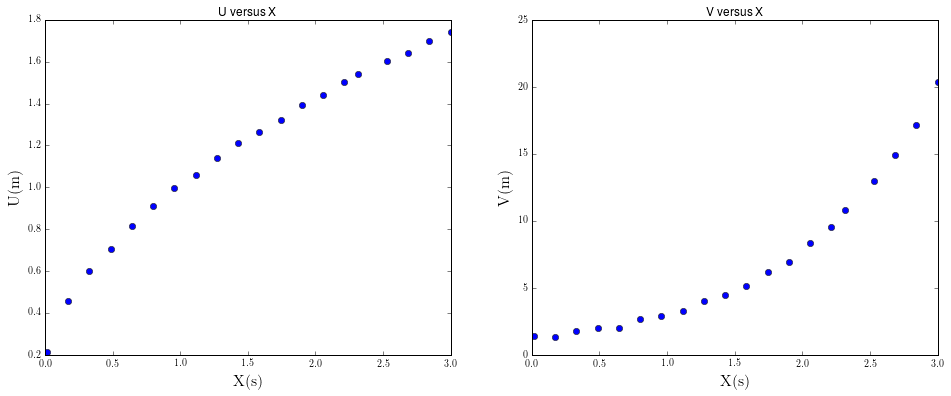

In [98]:
plt.figure(figsize=(16,6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.plot(x,u,'o')
plt.title(r'U versus X')
plt.ylabel(r'$\mathrm{U (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)

plt.subplot(122)
plt.plot(x,v,'o')
plt.ylabel(r'$\mathrm{V (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)
plt.title(r'V versus X')

plt.show()

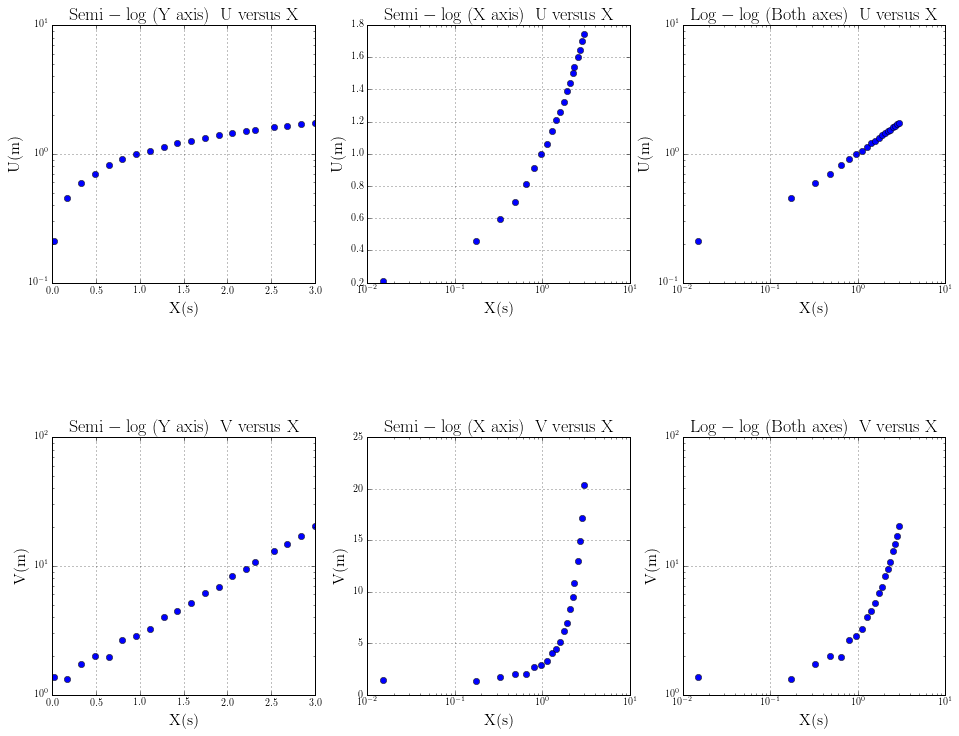

In [99]:
plt.figure(figsize=(16,12), dpi=100, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.6)

# log y axis
plt.subplot(231)
plt.semilogy(x, u, 'o')
plt.ylabel(r'$\mathrm{U (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)
plt.title(r'$\mathrm{Semi-log \ (Y \ axis) \ \ U \ versus \ X}$', fontsize = 18)
plt.grid(True)

# log x axis
plt.subplot(232)
plt.semilogx(x, u, 'o')
plt.ylabel(r'$\mathrm{U (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)
plt.title(r'$\mathrm{Semi-log \ (X \ axis) \ \ U \ versus \ X}$', fontsize = 18)
plt.grid(True)

# log x and y axis
plt.subplot(233)
plt.loglog(x, u, 'o')
plt.ylabel(r'$\mathrm{U (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)
plt.grid(True)
plt.title(r'$\mathrm{Log-log \ (Both \ axes)  \ \ U \ versus \ X}$', fontsize = 18)

# log y axis
plt.subplot(234)
plt.semilogy(x, v, 'o')
plt.ylabel(r'$\mathrm{V (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)
plt.title(r'$\mathrm{Semi-log \ (Y \  axis) \ \ V \ versus \ X}$', fontsize = 18)
plt.grid(True)

# log x axis
plt.subplot(235)
plt.semilogx(x, v, 'o')
plt.ylabel(r'$\mathrm{V (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)
plt.title(r'$\mathrm{Semi-log \ (X \ axis) \ \ V \ versus \ X}$', fontsize = 18)
plt.grid(True)

# log x and y axis
plt.subplot(236)
plt.loglog(x, v, 'o')
plt.ylabel(r'$\mathrm{V (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)
plt.grid(True)
plt.title(r'$\mathrm{Log-log \ (Both \ axes) \ \  V \ versus \ X}$', fontsize = 18)

From the above plots we can see that there is now a linear relationship shown in the semi-log Y plot of V versus X and in the log-log plot of U versus X.
The fact that we receive a straight line when plotting the semi-log of the Y axis for V versus X implies the following relationship is linear:

$$ \log_a (V) = m x + b $$

This seems to say that V is an exponential term.
The log-log plot implies that both sides of the relationship must be operated on by the log function in order to show the linear relationship between the variables:

$$ \log_a (U) = \log_a (mx+b) $$

The next question concerns error bars. I will use the data in column 'e' as the error values for a Y versus X plot.

<function matplotlib.pyplot.show>

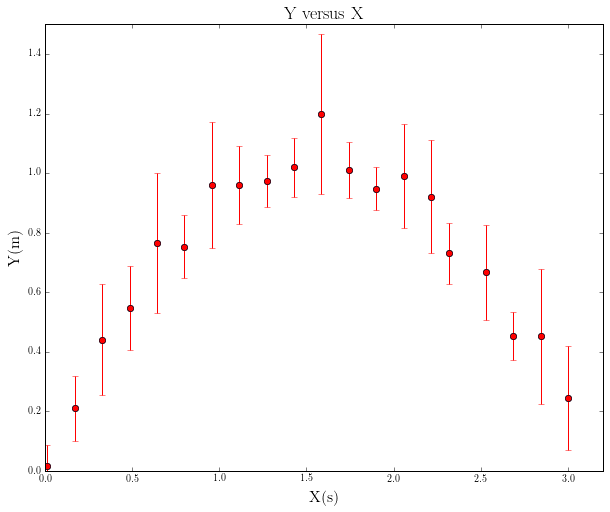

In [100]:
plt.plot(x,y,'o')

plt.xlim(0,3.2)
plt.ylim(0,1.5)

# Here is where I define the error bars in the y direction by length e in accordance with the y vs. x plot
plt.errorbar(x, y, fmt = 'ro', yerr = e)
# Titles and labels are defined next, using LaTeX
plt.title(r'$\mathrm{Y \ versus \ X}$', fontsize = 18)
plt.ylabel(r'$\mathrm{Y (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)

plt.show

The above graph satisfies question 3 and shows error bars extending in the y direction by the amount in the data table defined as 'e'.
Next is question 4, which asks for a quadratic fit line to the above data set. Conveniently numpy has a function which is a polynomial fit function using least squares. I will run this function and print the a,b, and c values respectively below:

In [101]:
z = np.polyfit(x,y,2) #this returns the array [a,b,c]
print(z)

a,b,c = z[0],z[1],z[2] #this defines them as a,b and c by slicing up the resultant array from the polyfit function
print(a,b,c)

#now I need a function to use my coefficient values and produce the desired fit line
def quadfit(a,b,c,x):
    return a*x**2+b*x+c


[-0.41725866  1.3126319   0.02259448]
-0.417258659811 1.31263190385 0.022594476526


Now I will plot the data with error bars and a best fit line.

<function matplotlib.pyplot.show>

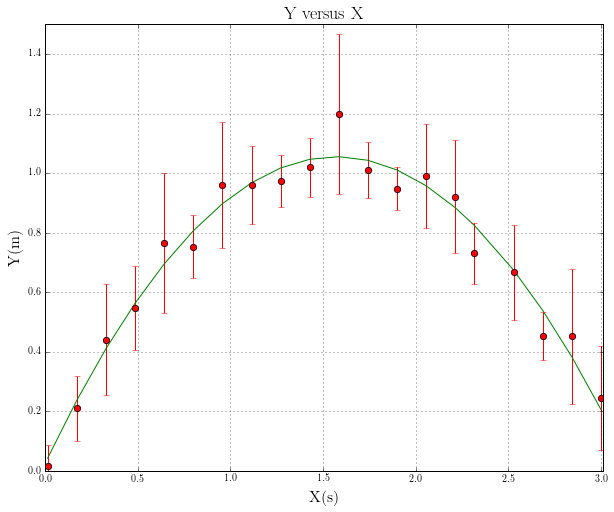

In [102]:
plt.plot(x,y,'o')
plt.plot(x,quadfit(a,b,c,x))

plt.xlim(0,3.01)
plt.ylim(0,1.5)

plt.errorbar(x, y, fmt = 'ro', yerr = e)

plt.title(r'$\mathrm{Y \ versus \ X}$', fontsize = 18)
plt.ylabel(r'$\mathrm{Y (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)
plt.grid(True)
plt.show

For the final exercise I will fit the Y vs. X data with a gaussian fit line and then a cosine fit line. 

In [103]:
popt, pcov = curve_fit(gaussianWithOffset, x, y)  # popt = OPTimal Parameters for fit; COVariance matrix
print(popt)

sigma = np.sqrt([pcov[0,0], pcov[1,1], pcov[2,2]]) # sqrt(diag elements) of pcov are the 1 sigma deviations
print(pcov)

values = np.array([
    gaussianWithOffset(x, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] + sigma[2]), 
    gaussianWithOffset(x, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] + sigma[2]),   
    gaussianWithOffset(x, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] - sigma[2]), 
    gaussianWithOffset(x, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] - sigma[2]), 
    gaussianWithOffset(x, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] + sigma[2]), 
    gaussianWithOffset(x, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] + sigma[2]),
    gaussianWithOffset(x, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] - sigma[2]), 
    gaussianWithOffset(x, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] - sigma[2]) 
    ])
fitError = np.std(values, axis=0)

[ 1.10721112  1.57239239  0.87295933]
[[  1.31089084e-03  -3.30561329e-05  -8.56876102e-04]
 [ -3.30561329e-05   1.11606236e-03   6.74304857e-05]
 [ -8.56876102e-04   6.74304857e-05   1.48324147e-03]]


<function matplotlib.pyplot.show>

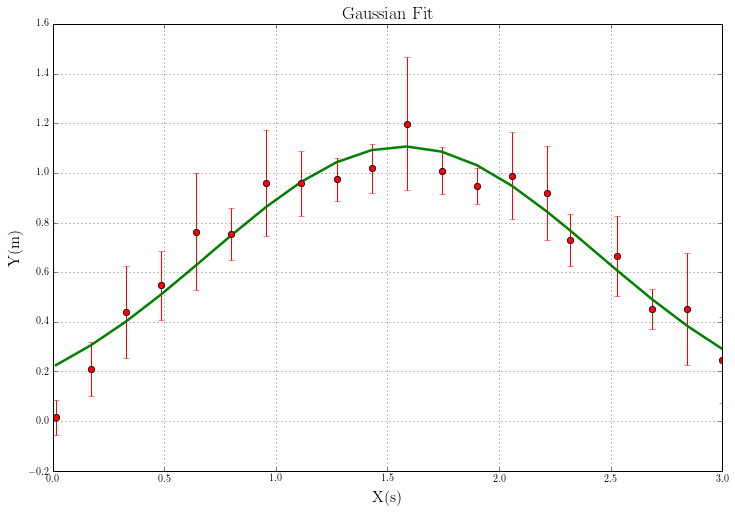

In [104]:

fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
curveFit = gaussianWithOffset(x,popt[0], popt[1], popt[2] )
plt.plot(x, y, 'o')
plt.hold(True)
plt.plot(x, curveFit, 
    linewidth=2.5, 
    color = 'green')
#plt.xlim(0,20)
#plt.ylim(0.2,-0.5)

plt.errorbar(x, y, fmt = 'ro', yerr = e)

plt.title(r'$\mathrm{Gaussian \ Fit}$', fontsize = 18)
plt.ylabel(r'$\mathrm{Y (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)
plt.grid(True)
plt.show

<function matplotlib.pyplot.show>

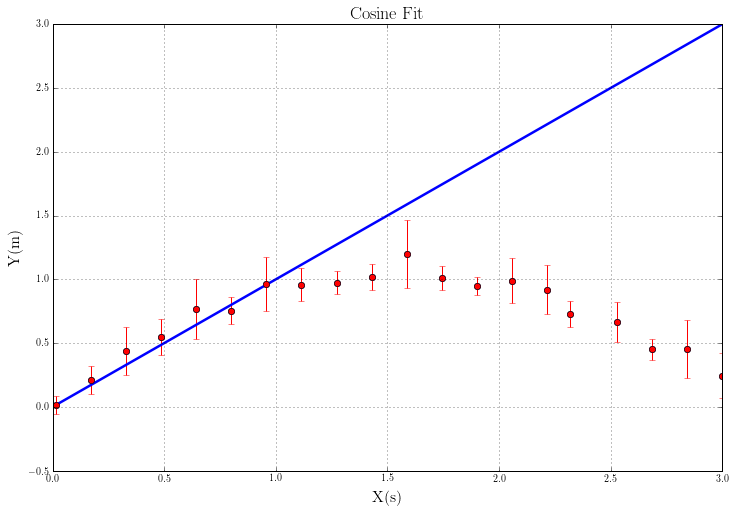

In [115]:
x = data[ : ,0]
z = data[ : ,1]
u = data[ : ,2]
v = data[ : ,3]
y = data[ : ,4]
e = data[ : ,5]

popt2, pcov2 = curve_fit(funcCosine, x, y)  # popt = OPTimal Parameters for fit; COVariance matrix
print(popt2)

sigma2 = np.sqrt([pcov2[0,0], pcov2[1,1], pcov2[2,2]]) # sqrt(diag elements) of pcov are the 1 sigma deviations
print(pcov2)

values = np.array([
    funcCosine(x, popt2[0] + sigma2[0], popt2[1] + sigma2[1], popt2[2] + sigma2[2]), 
    funcCosine(x, popt2[0] + sigma2[0], popt2[1] - sigma2[1], popt2[2] + sigma2[2]),   
    funcCosine(x, popt2[0] + sigma2[0], popt2[1] + sigma2[1], popt2[2] - sigma2[2]), 
    funcCosine(x, popt2[0] + sigma2[0], popt2[1] - sigma2[1], popt2[2] - sigma2[2]), 
    funcCosine(x, popt2[0] - sigma2[0], popt2[1] + sigma2[1], popt2[2] + sigma2[2]), 
    funcCosine(x, popt2[0] - sigma2[0], popt2[1] - sigma2[1], popt2[2] + sigma2[2]),
    funcCosine(x, popt2[0] - sigma2[0], popt2[1] + sigma2[1], popt2[2] - sigma2[2]), 
    funcCosine(x, popt2[0] - sigma2[0], popt2[1] - sigma2[1], popt2[2] - sigma2[2]) 
    ])
fitError = np.std(values, axis=0)


fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
curveFit2 = funcCosine(x,popt[0], popt[1], popt[2] )
plt.plot(x, y, 'o')
plt.hold(True)
plt.plot(x, curveFit2, 
    linewidth=2.5, 
    color = 'blue')
#plt.xlim(0,20)
#plt.ylim(0.2,-0.5)

plt.errorbar(x, y, fmt = 'ro', yerr = e)

plt.title(r'$\mathrm{Cosine \ Fit}$', fontsize = 18)
plt.ylabel(r'$\mathrm{Y (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{X (s)}$', fontsize = 16)
plt.grid(True)
plt.show

SOURCES:
http://matplotlib.org/examples/pylab_examples/log_demo.html
https://en.wikipedia.org/wiki/Semi-log_plot
http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html
http://stackoverflow.com/questions/19165259/python-numpy-scipy-curve-fitting
